In [48]:
import umap.umap_ as umap
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

import matplotlib.pyplot as plt

train_data = np.load('train_data.npy')
train_labs = np.load('train_labels.npy')
test_data = np.load('test_data.npy')
test_labs = np.load('test_labels.npy')

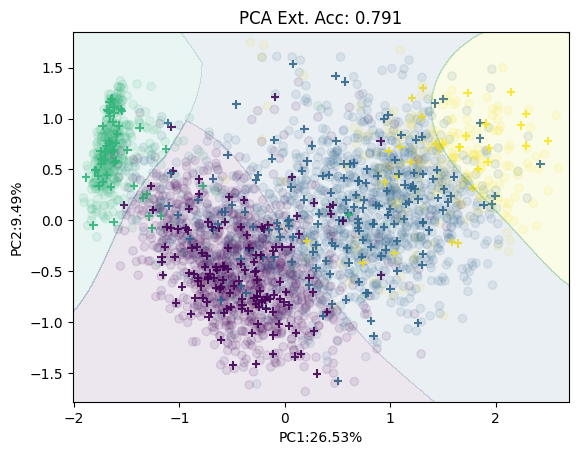

In [49]:
pca = PCA(n_components=2)
scaler = preprocessing.StandardScaler(with_std=False).fit(train_data)

train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

scrs = pca.fit_transform(train_data)
scrs_test = pca.transform(test_data)

svc = SVC().fit(scrs, train_labs)
acc = svc.score(scrs_test, test_labs)

ax = plt.gca()

plt.scatter(scrs[:,0], scrs[:,1], c=train_labs,alpha=0.1)
plt.scatter(scrs_test[:,0],scrs_test[:,1],c=test_labs,marker='+',alpha=0.9)
plt.title(f'PCA Ext. Acc: {acc:.3f}')
plt.xlabel(f'PC1:{pca.explained_variance_ratio_[0]*100:.2f}%')
plt.ylabel(f'PC2:{pca.explained_variance_ratio_[1]*100:.2f}%')
DecisionBoundaryDisplay.from_estimator(
            svc, scrs, alpha=0.1, eps=0.1, ax = ax, grid_resolution=500
        )
plt.show()

UMAP(min_dist=0.6, n_neighbors=5, verbose=True)
Tue Jan 23 12:33:26 2024 Construct fuzzy simplicial set
Tue Jan 23 12:33:29 2024 Finding Nearest Neighbors
Tue Jan 23 12:33:29 2024 Finished Nearest Neighbor Search
Tue Jan 23 12:33:29 2024 Construct embedding


Epochs completed:  12%| █▏         60/500 [00:01]

	completed  0  /  500 epochs
	completed  50  /  500 epochs


Epochs completed:  25%| ██▌        127/500 [00:02]

	completed  100  /  500 epochs
	completed  150  /  500 epochs


Epochs completed:  46%| ████▌      231/500 [00:02]

	completed  200  /  500 epochs
	completed  250  /  500 epochs


Epochs completed:  83%| ████████▎  416/500 [00:02]

	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs


Epochs completed: 100%| ██████████ 500/500 [00:02]


	completed  450  /  500 epochs
Tue Jan 23 12:33:31 2024 Finished embedding


Epochs completed: 100%| ██████████ 100/100 [00:01]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs


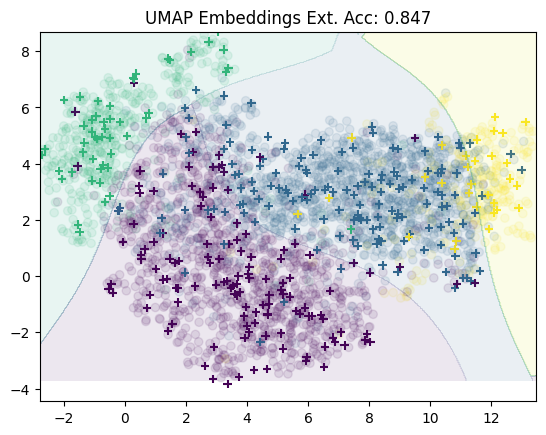

In [50]:
reducer_euclidean = umap.UMAP(n_components=2,
                              n_neighbors=5,
                              min_dist=0.6,
                              metric='euclidean',
                              verbose=True)

train_embds = reducer_euclidean.fit(train_data)
test_embds = reducer_euclidean.transform(test_data)

svc = SVC().fit(train_embds.embedding_, train_labs)
acc = svc.score(test_embds, test_labs)

ax = plt.gca()

plt.scatter(train_embds.embedding_[:,0],train_embds.embedding_[:,1],c=train_labs,alpha=0.1)
plt.scatter(test_embds[:,0],test_embds[:,1],c=test_labs,marker='+')
plt.title(f'UMAP Embeddings Ext. Acc: {acc:.3f}')
DecisionBoundaryDisplay.from_estimator(
            svc, train_embds.embedding_, alpha=0.1, eps=0.1, ax = ax, grid_resolution=500
        )

plt.show()

UMAP(angular_rp_forest=True, metric='correlation', min_dist=0.6, n_neighbors=5, verbose=True)
Tue Jan 23 12:36:25 2024 Construct fuzzy simplicial set
Tue Jan 23 12:36:30 2024 Finding Nearest Neighbors
Tue Jan 23 12:36:30 2024 Finished Nearest Neighbor Search
Tue Jan 23 12:36:30 2024 Construct embedding


Epochs completed:  14%| █▎         68/500 [00:01]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs


Epochs completed:  42%| ████▏      211/500 [00:02]

	completed  150  /  500 epochs
	completed  200  /  500 epochs


Epochs completed:  69%| ██████▉    347/500 [00:02]

	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs


Epochs completed: 100%| ██████████ 500/500 [00:02]

	completed  400  /  500 epochs
	completed  450  /  500 epochs
Tue Jan 23 12:36:33 2024 Finished embedding



Epochs completed: 100%| ██████████ 100/100 [00:01]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs


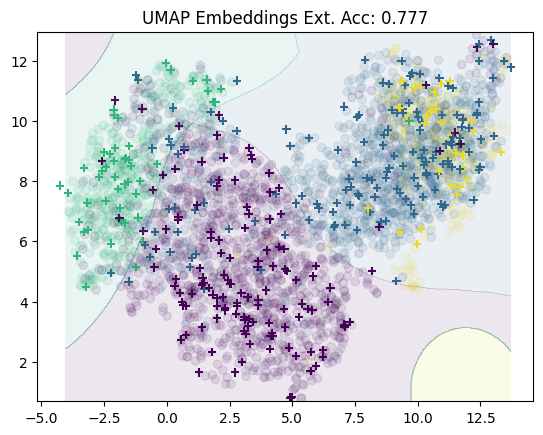

In [53]:
reducer_correlation = umap.UMAP(n_components=2,
                              n_neighbors=5,
                              min_dist=0.6,
                              metric='correlation',
                              verbose=True)

train_embds = reducer_correlation.fit(train_data)
test_embds = reducer_correlation.transform(test_data)

svc = SVC().fit(train_embds.embedding_, train_labs)
acc = svc.score(test_embds, test_labs)

ax = plt.gca()

plt.scatter(train_embds.embedding_[:,0],train_embds.embedding_[:,1],c=train_labs,alpha=0.1)
plt.scatter(test_embds[:,0],test_embds[:,1],c=test_labs,marker='+')
plt.title(f'UMAP Embeddings Ext. Acc: {acc:.3f}')
DecisionBoundaryDisplay.from_estimator(
            svc, train_embds.embedding_, alpha=0.1, eps=0.1, ax = ax, grid_resolution=500
        )
plt.show()